In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
df=pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\Downloads\processed.cleveland (2).data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
# * age,
# * sex,
# * cp, chest pain
# * restbps, resting blood pressure(in mm Hg)
# * chol, serum cholestrol in mg/dl
# * fbs , fasting blood sugar
# * restecg, resting electrocardiographic result
# *thalach, maximum heart rate achieved
# *exang, exercised induced angina
# *oldpeak, ST depression induced by exercise relative to rest
# *slope, the slope of the peak exercise ST segment
# *ca, number of major vessels(0-3) colored by fluoroscopy
# *thal, this is short for thalium heart scan
# *hd, diagnosis of heart disease,the predicted attribute

In [3]:
df.columns=['age','sex','cp','restbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.isna().sum()

age        0
sex        0
cp         0
restbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

<Axes: >

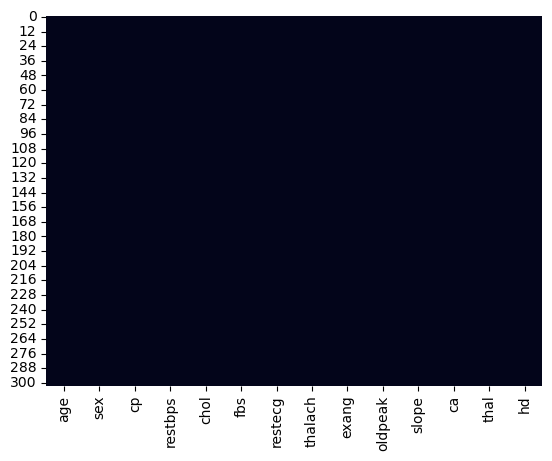

In [5]:
sns.heatmap(df.isnull(),cbar=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbps  303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [8]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [10]:
df.loc[(df['ca']=='?') | (df['thal']=='?')]

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [11]:
len(df.loc[(df['ca']=='?') | (df['thal']=='?')])

6

In [18]:
df_no_missing=df.loc[(df['ca']!='?') & (df['thal']!='?')]
df_no_missing

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [19]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [20]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [21]:
x=df_no_missing.drop('hd',axis=1).copy()
x

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [23]:
y=df_no_missing['hd'].copy()
y

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: hd, Length: 297, dtype: int64

In [24]:
x['cp'].unique()

array([1., 4., 3., 2.])

In [27]:
pd.get_dummies(x,columns=['cp'],dtype='int32').head()

,age,sex,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [28]:
x_encoder=pd.get_dummies(x,columns=['cp','restecg','slope','thal'],drop_first=True)
x_encoder

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,False,False,False,False,True,False,True,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,False,True,False,True,True,False,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,False,True,False,True,True,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,True,False,False,False,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,False,False,True,False,False,True,False,False,True
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,False,False,False,False,False,True,False,False,True
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,False,False,True,False,False,True,False,False,True
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,False,False,True,False,False,True,False,False,True


In [29]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [30]:
y[y>0]=1
y.unique()

array([0, 1], dtype=int64)

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x_encoder,y,random_state=42)
print(xtrain.shape)
print(ytrain.shape)

(222, 18)
(222,)


In [32]:
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=42)

[Text(0.5677966101694916, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = nohd'),
 Text(0.3347457627118644, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = nohd'),
 Text(0.21610169491525424, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = nohd'),
 Text(0.1440677966101695, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = nohd'),
 Text(0.0847457627118644, 0.625, 'oldpeak <= 1.7\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = nohd'),
 Text(0.05084745762711865, 0.5416666666666666, 'restbps <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = nohd'),
 Text(0.03389830508474576, 0.4583333333333333, 'restbps <= 106.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = nohd'),
 Text(0.01694915254237288, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = nohd'),
 Text(0.05084745762711865, 0.375, 'age <= 50.5\ngini = 0.5\nsa

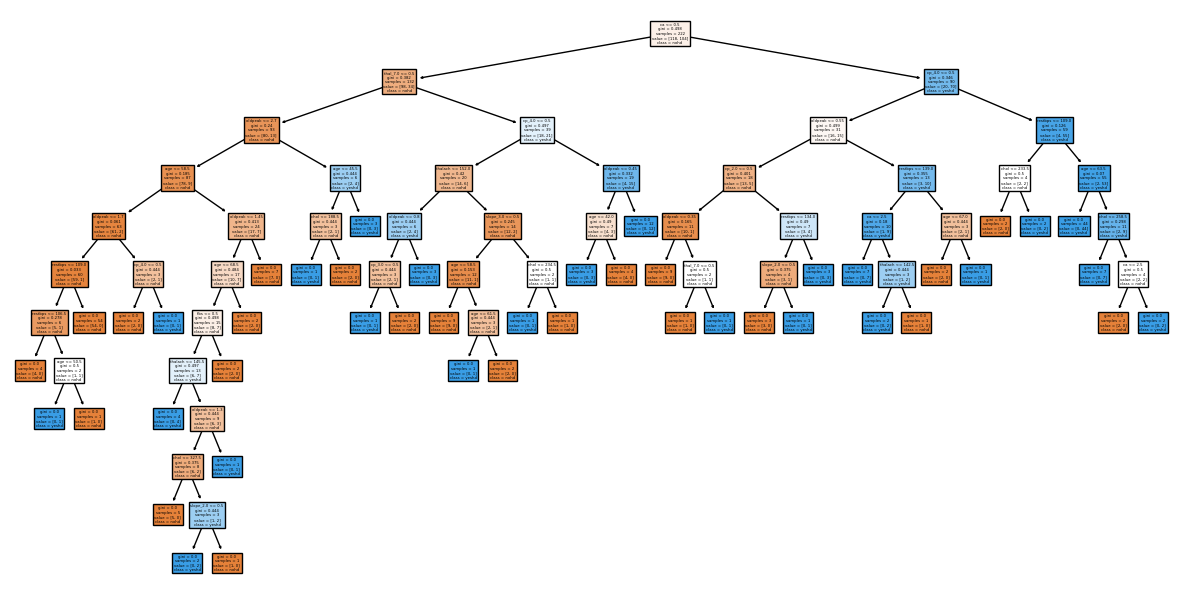

In [41]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,class_names=['nohd','yeshd'],feature_names=list(x_encoder.columns))

In [35]:
pred=clf_dt.predict(xtest)

In [36]:
cm=confusion_matrix(ytest,pred)
cm

array([[30, 12],
       [ 6, 27]], dtype=int64)

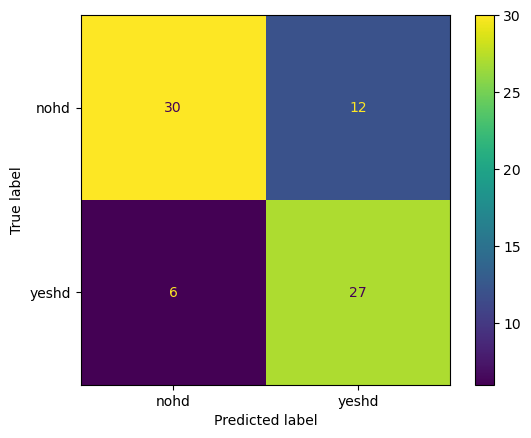

In [37]:
disp=ConfusionMatrixDisplay(cm,display_labels=['nohd','yeshd'])
disp.plot()

In [38]:
clf_dt.score(xtrain,ytrain)

1.0

In [39]:
clf_dt.score(xtest,ytest)

0.76

### Pruning

In [42]:
path=clf_dt.cost_complexity_pruning_path(xtrain,ytrain)
path

{'ccp_alphas': array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
        0.00429358, 0.00578761, 0.00600601, 0.00600601, 0.00600601,
        0.00600601, 0.0063593 , 0.00667591, 0.00675676, 0.00757375,
        0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
        0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
        0.03934523, 0.13046216]),
 'impurities': array([0.        , 0.00885886, 0.02430287, 0.03241098, 0.04060099,
        0.04918815, 0.06655097, 0.08456898, 0.096581  , 0.10859301,
        0.11459901, 0.13367692, 0.14035282, 0.14710958, 0.15468333,
        0.17091343, 0.17960069, 0.18849919, 0.19888101, 0.2094587 ,
        0.2379082 , 0.25394872, 0.27037333, 0.29140408, 0.32820413,
        0.36754937, 0.49801153])}

In [43]:
ccp_alpha=path.ccp_alphas
ccp_alpha

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00578761, 0.00600601, 0.00600601, 0.00600601,
       0.00600601, 0.0063593 , 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523, 0.13046216])

In [44]:
ccp_alphas=ccp_alpha[:-1]
ccp_alphas

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00578761, 0.00600601, 0.00600601, 0.00600601,
       0.00600601, 0.0063593 , 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])

In [45]:
clf_dts=[]
for ccp_alpha in ccp_alphas:
    ccp_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    ccp_dt.fit(xtrain,ytrain)
    clf_dts.append(ccp_dt)

In [47]:
clf_dts

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0029529529529529544, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003861003861003862, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004054054054054055, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004095004095004095, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004293579293579285, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005787605787605791, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0063593004769475344, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006675906675906675, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006756756756756757, random_state=0),
 Decisio

In [49]:
train_Score=[clf_dt.score(xtrain,ytrain) for clf_dt in clf_dts]
test_Score=[clf_dt.score(xtest,ytest) for clf_dt in clf_dts]

In [50]:
test_Score

[0.76,
 0.76,
 0.76,
 0.76,
 0.76,
 0.7733333333333333,
 0.7733333333333333,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8133333333333334,
 0.8133333333333334,
 0.8133333333333334,
 0.8266666666666667,
 0.8266666666666667,
 0.8533333333333334,
 0.8533333333333334,
 0.7866666666666666,
 0.7066666666666667]

In [51]:
train_Score

[1.0,
 0.9954954954954955,
 0.9819819819819819,
 0.9774774774774775,
 0.972972972972973,
 0.9594594594594594,
 0.9324324324324325,
 0.9099099099099099,
 0.9099099099099099,
 0.9099099099099099,
 0.9099099099099099,
 0.9099099099099099,
 0.9054054054054054,
 0.9009009009009009,
 0.9009009009009009,
 0.8918918918918919,
 0.8828828828828829,
 0.8783783783783784,
 0.8693693693693694,
 0.8693693693693694,
 0.8513513513513513,
 0.8423423423423423,
 0.8108108108108109,
 0.7747747747747747,
 0.7702702702702703,
 0.7567567567567568]

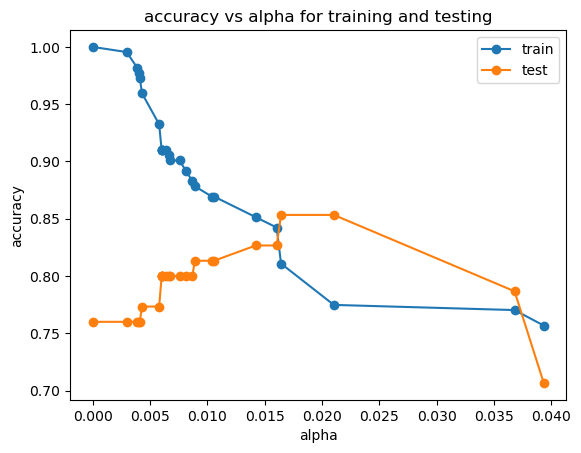

In [55]:
fig,ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for training and testing')
ax.plot(ccp_alphas,train_Score,marker='o',label='train')
ax.plot(ccp_alphas,test_Score,marker='o',label='test')
ax.legend()
plt.show()

In [57]:
clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)
score=cross_val_score(clf_dt,xtrain,ytrain,cv=5)
df=pd.DataFrame(data={'tree':range(5),'accuracy':score})
df

,tree,accuracy
0,0,0.600000
1,1,0.866667
2,2,0.750000
3,3,0.772727
4,4,0.750000


In [58]:
alpha_loop_value=[]
for ccp_alpha in ccp_alphas:
    ccp_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    score=cross_val_score(ccp_dt,xtrain,ytrain,cv=5)
    alpha_loop_value.append([ccp_alpha,np.mean(score)])
alpha_loop_value

[[0.0, 0.7297979797979799],
 [0.0029529529529529544, 0.7297979797979799],
 [0.003861003861003862, 0.7297979797979799],
 [0.004054054054054055, 0.7297979797979799],
 [0.004095004095004095, 0.7297979797979799],
 [0.004293579293579285, 0.7297979797979799],
 [0.005787605787605791, 0.7342424242424243],
 [0.006006006006006006, 0.7342424242424243],
 [0.006006006006006006, 0.7342424242424243],
 [0.006006006006006006, 0.7342424242424243],
 [0.006006006006006006, 0.7342424242424243],
 [0.0063593004769475344, 0.7342424242424243],
 [0.006675906675906675, 0.7342424242424243],
 [0.006756756756756757, 0.7342424242424243],
 [0.007573750220809049, 0.7386868686868688],
 [0.008115048793014888, 0.7476767676767677],
 [0.008687258687258686, 0.7476767676767677],
 [0.008898508898508902, 0.7476767676767677],
 [0.01038181038181038, 0.7297979797979798],
 [0.010577695922523535, 0.7297979797979798],
 [0.014224751066856332, 0.7523232323232323],
 [0.01604051214729746, 0.7478787878787878],
 [0.01642461319880674, 0.74

<Axes: xlabel='alpha'>

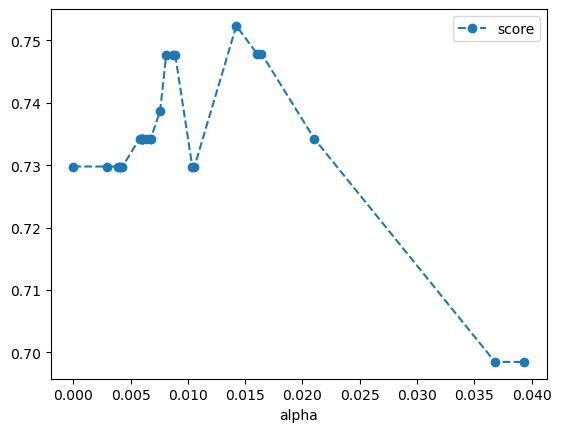

In [60]:
alpha_result=pd.DataFrame(alpha_loop_value,columns=['alpha','score'])
alpha_result.plot(x='alpha',y='score',marker='o',linestyle='--')

In [61]:
ideal_ccp=alpha_result[(alpha_result['alpha']>0.014) & (alpha_result['alpha']<0.015)]['alpha']
ideal_ccp

20    0.014225
Name: alpha, dtype: float64

In [63]:
ideal_ccp_value=float(ideal_ccp)
ideal_ccp_value

C:\Users\archa\AppData\Local\Temp\ipykernel_53420\2482669526.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_ccp_value=float(ideal_ccp)


0.014224751066856332

In [64]:
model=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_value)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

In [65]:
pred=model.predict(xtest)

In [66]:
cm=confusion_matrix(ytest,pred)
cm

array([[34,  8],
       [ 5, 28]], dtype=int64)

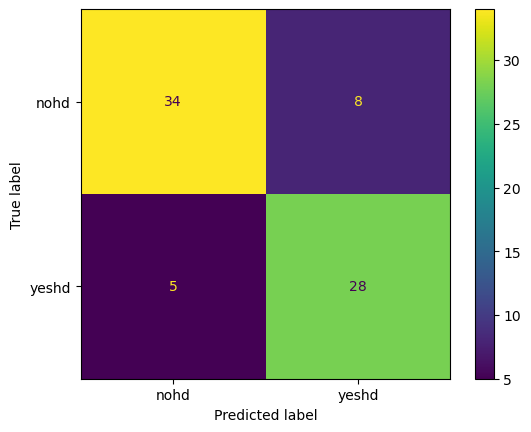

In [67]:
disp=ConfusionMatrixDisplay(cm,display_labels=['nohd','yeshd'])
disp.plot()

[Text(0.5769230769230769, 0.875, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = nohd'),
 Text(0.3076923076923077, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = nohd'),
 Text(0.15384615384615385, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = nohd'),
 Text(0.07692307692307693, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = nohd'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = yeshd'),
 Text(0.46153846153846156, 0.375, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = yeshd'),
 Text(0.38461538461538464, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = nohd'),
 Text(0.5384615384615384, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = yeshd'),
 Text(0.8461538461538461, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = yeshd'),
 Text(0.7692307692307693, 0.375, 'oldpeak <= 0.55\ngini =

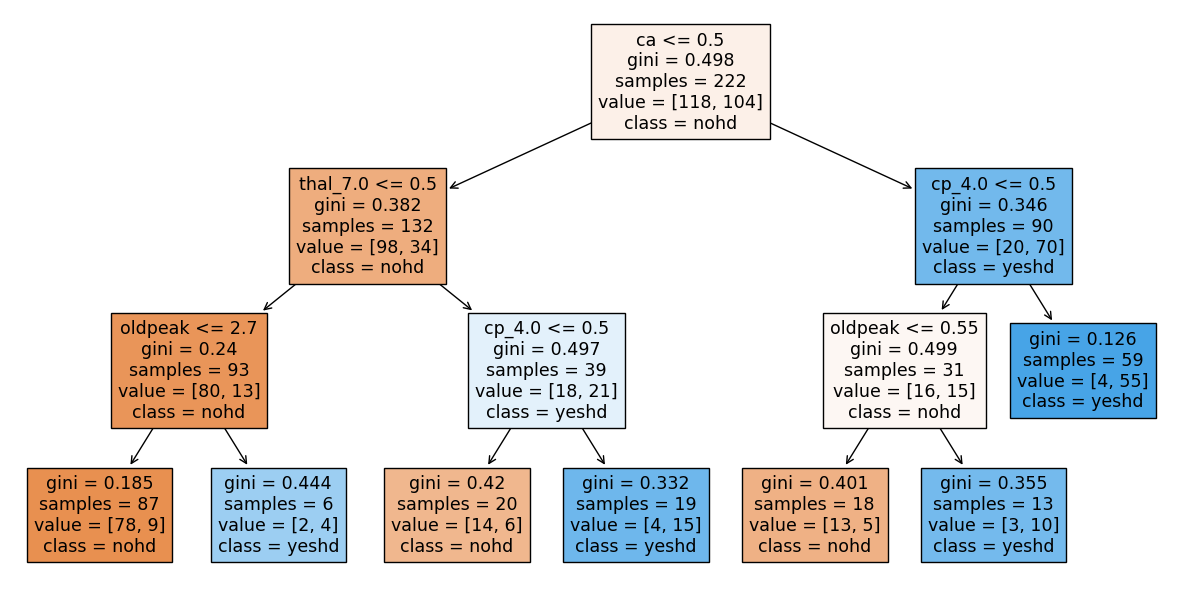

In [68]:
plt.figure(figsize=(15,7.5))
plot_tree(model,filled=True,class_names=['nohd','yeshd'],feature_names=list(x_encoder.columns))

In [69]:
model.score(xtrain,ytrain)

0.8513513513513513

In [70]:
model.score(xtest,ytest)

0.8266666666666667